In [1]:

import pandas as pd
import matplotlib.pyplot as plt

## 2.1 SAC (Sistema de Amortização Constante)

No SAC, a amortização do capital é constante ao longo do tempo, enquanto os juros diminuem conforme a dívida é paga. Como resultado, as parcelas iniciais são mais altas e vão reduzindo ao longo do tempo.

In [2]:
def amortization(
        p: float,
        n: int
):
    """
    Calcula a amortização de um empréstimo.

    - Args:
      - p: float: Valor do empréstimo.
      - n: int: Número de parcelas.
    """

    return p/n


def fees(
        s: float,
        i: float,
):
    """
    Calcula os juros de um empréstimo.

    - Args:
      - s: float: Saldo devedor.
      - i: float: Taxa de juros.

    """

    return s * i


def installment(
    a: float,
    j: float
):
    """
    Calcula o valor da parcela de um empréstimo.

    - Args:
      - a: float: Amortização.
      - j: float: Juros.

    """

    return a + j

## 2.2 Sistema Price (Parcelas Iguais com Juros)

No Sistema Price, o valor das parcelas é fixo ao longo do tempo. Inicialmente, a maior parte da parcela corresponde aos juros, enquanto a amortização aumenta com o tempo.

In [3]:
def price(
        p: float,
        n: int,
        i: float
):
    """
    Calcula o preço de um empréstimo.

    - Args:
      - p: float: Valor do empréstimo.
      - n: int: Número de parcelas.
      - i: float: Taxa de juros.

    """

    return (p * i) / (1 - (1 + i) ** -n) * (1 + i)

# Exemplo 1: SAC

Considere um empréstimo de R$ 10.000,00 a uma taxa de juros de 1% ao mês, pago em 5 meses.

Mês 1: Amortização = 2000.00, Juros = 100.00, Parcela = 2100.00, Saldo Devedor = 8000.00
Mês 2: Amortização = 2000.00, Juros = 80.00, Parcela = 2080.00, Saldo Devedor = 6000.00
Mês 3: Amortização = 2000.00, Juros = 60.00, Parcela = 2060.00, Saldo Devedor = 4000.00
Mês 4: Amortização = 2000.00, Juros = 40.00, Parcela = 2040.00, Saldo Devedor = 2000.00
Mês 5: Amortização = 2000.00, Juros = 20.00, Parcela = 2020.00, Saldo Devedor = 0.00


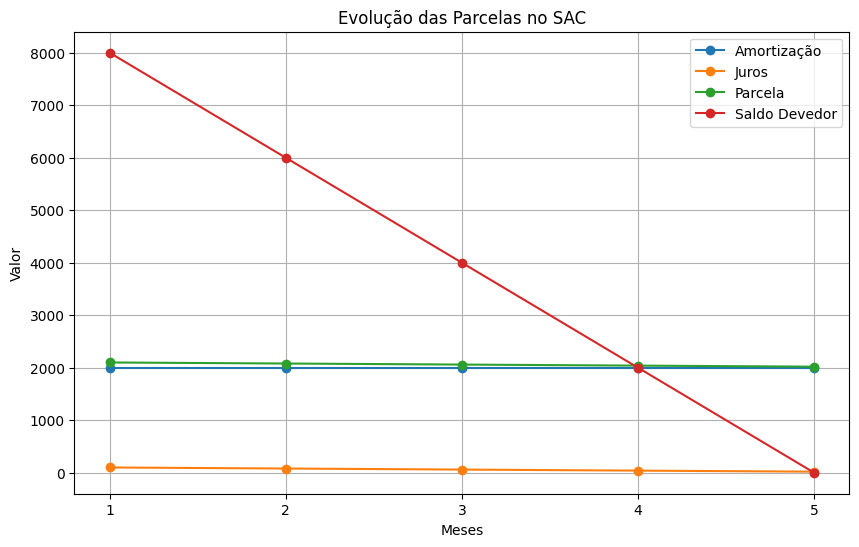

   Mês  Amortização  Juros  Parcela  Saldo Devedor
0    1       2000.0  100.0   2100.0         8000.0
1    2       2000.0   80.0   2080.0         6000.0
2    3       2000.0   60.0   2060.0         4000.0
3    4       2000.0   40.0   2040.0         2000.0
4    5       2000.0   20.0   2020.0            0.0


In [ ]:
p = 10000  
n = 5      
i = 0.01  


a = amortization(p, n)

results = []


saldo_devedor = p
for mes in range(1, n + 1):
    j = fees(saldo_devedor, i)  
    parcela = installment(a, j) 
    saldo_devedor -= a 
    results.append((mes, a, j, parcela, saldo_devedor))
    print(f"Mês {mes}: Amortização = {a:.2f}, Juros = {j:.2f}, Parcela = {parcela:.2f}, Saldo Devedor = {saldo_devedor:.2f}")


df = pd.DataFrame(results, columns=["Mês", "Amortização", "Juros", "Parcela", "Saldo Devedor"])

plt.figure(figsize=(10, 6))
plt.plot(df["Mês"], df["Amortização"], label="Amortização", marker='o')
plt.plot(df["Mês"], df["Juros"], label="Juros", marker='o')
plt.plot(df["Mês"], df["Parcela"], label="Parcela", marker='o')
plt.plot(df["Mês"], df["Saldo Devedor"], label="Saldo Devedor", marker='o')
plt.title("Evolução das Parcelas no SAC")
plt.xlabel("Meses")
plt.ylabel("Valor")
plt.xticks(df["Mês"])
plt.legend()
plt.grid()
plt.show()

print(df)

## **Fórmula da parcela fixa:**

Para o mesmo empréstimo de R$ 10.000,00 a 1% ao mês em 5 meses:

Cálculo da parcela fixa:

$$
P = \frac{10000 \times 0.01}{1 - (1 + 0.01)^{-5}} \approx 2.121,33
$$


| Mês | Juros (J) | Amortização (A) | Parcela (P) | Saldo Devedor |
|------|------------|----------------|-------------|---------------|
| 1    | R$ 100,00     | R$ 1981,00        | R$ 2081.00   | R$ 8019.00      |
| 2    |R$  80,19      | R$ 2.000,81       | R$ 2081.00   | R$ 6018.19      |
| 3    |R$  60,18      | R$ 2020,82        | R$ 2081.00   | R$ 3997.37      |
| 4    | R$ 39,87      | R$ 2041,03        | R$ 2081.00   | R$ 1956.34      |
| 5    | R$ 19,56      | R$  1956,34        | R$ 1975.90   | R$ 0,00          |

Gráfico: Evolução das Parcelas no Sistema Price

(Gráfico de linhas mostrando a redução dos juros e aumento da amortização ao longo do tempo)
$$

Tabela Corrigida (Sistema Price)
------------------------------------
| Mês  | Juros (J)  | Amortização (A) | Parcela (P)  | Saldo Devedor |
------------------------------------
| 1    | R$  100.00 | R$       1981.00 | R$   2081.00 | R$    8019.00 |
| 2    | R$   80.19 | R$       2000.81 | R$   2081.00 | R$    6018.19 |
| 3    | R$   60.18 | R$       2020.82 | R$   2081.00 | R$    3997.37 |
| 4    | R$   39.97 | R$       2041.03 | R$   2081.00 | R$    1956.34 |
| 5    | R$   19.56 | R$       1956.34 | R$   1975.90 | R$       0.00 |
------------------------------------


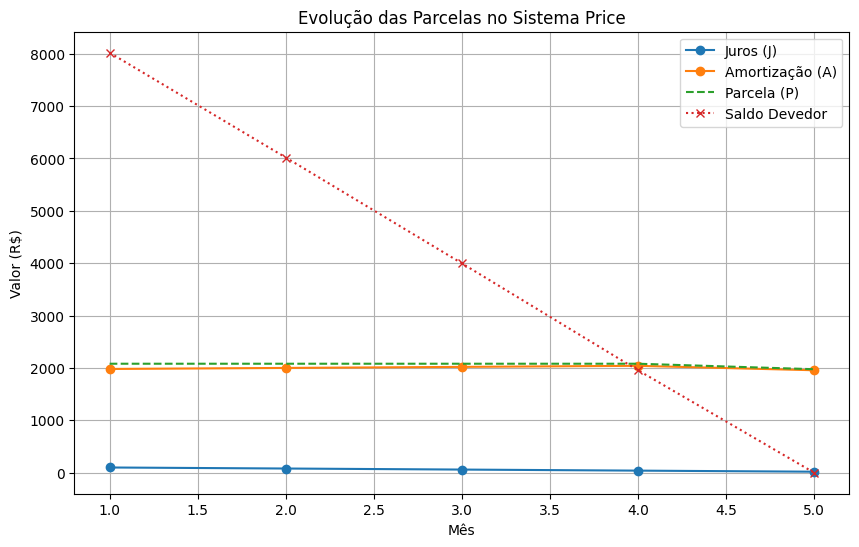

In [ ]:
principal = 10000
taxa_juros = 0.01
periodos = 5


parcela = price(principal, periodos, taxa_juros)
saldo_devedor = principal


meses = []
juros_lista = []
amortizacao_lista = []
parcela_lista = []
saldo_devedor_lista = []

print("Tabela Corrigida (Sistema Price)")
print("------------------------------------")
print(f"| {'Mês':<4} | {'Juros (J)':<10} | {'Amortização (A)':<15} | {'Parcela (P)':<12} | {'Saldo Devedor':<12} |")
print("------------------------------------")

for mes in range(1, periodos + 1):
    juros_mes = saldo_devedor * taxa_juros
    
    # Ajuste na última parcela
    if mes == periodos:
        amortizacao_mes = saldo_devedor
        parcela_mes = juros_mes + amortizacao_mes
    else:
        amortizacao_mes = parcela - juros_mes
        parcela_mes = parcela
    
    saldo_devedor -= amortizacao_mes
    

    meses.append(mes)
    juros_lista.append(juros_mes)
    amortizacao_lista.append(amortizacao_mes)
    parcela_lista.append(parcela_mes)
    saldo_devedor_lista.append(max(saldo_devedor, 0))
    
    print(f"| {mes:<4} | R$ {juros_mes:>7.2f} | R$ {amortizacao_mes:>13.2f} | R$ {parcela_mes:>9.2f} | R$ {max(saldo_devedor, 0):>10.2f} |")

print("------------------------------------")


plt.figure(figsize=(10, 6))
plt.plot(meses, juros_lista, label="Juros (J)", marker="o")
plt.plot(meses, amortizacao_lista, label="Amortização (A)", marker="o")
plt.plot(meses, parcela_lista, label="Parcela (P)", linestyle="--")
plt.plot(meses, saldo_devedor_lista, label="Saldo Devedor", linestyle=":", marker="x")
plt.xlabel("Mês")
plt.ylabel("Valor (R$)")
plt.title("Evolução das Parcelas no Sistema Price")
plt.legend()
plt.grid()
plt.show()